___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

## Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Indest Data

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum().any()

False

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

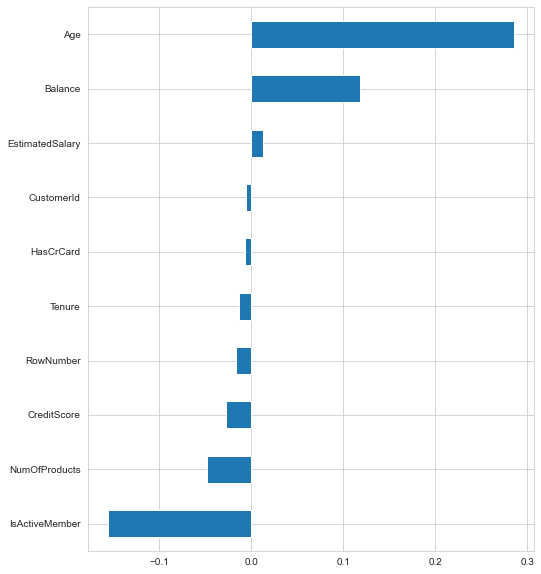

In [9]:
plt.figure(figsize = (8,10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh");

In [10]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


In [12]:
Gender_dummy = pd.get_dummies(df["Gender"], prefix = "Gender")
df = pd.concat([df, Gender_dummy], axis = 1)
Geography_dummy = pd.get_dummies(df["Geography"], prefix = "Geography")
df = pd.concat([df, Geography_dummy], axis = 1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1,1,0,1,0,0
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0,1,0,0,0,1
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1,1,0,1,0,0
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0,1,0,1,0,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0,1,0,0,0,1


In [13]:
df = df.drop(['Geography','Gender'],axis=1)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.000,1,1,1,101348.880,1,1,0,1,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,1,0,0,0,1
2,502,42,8,159660.800,3,1,0,113931.570,1,1,0,1,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,1,0,1,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000,2,1,0,96270.640,0,0,1,1,0,0
9996,516,35,10,57369.610,1,1,1,101699.770,0,0,1,1,0,0
9997,709,36,7,0.000,1,0,1,42085.580,1,1,0,1,0,0
9998,772,42,3,75075.310,2,1,0,92888.520,1,0,1,0,1,0


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000
Gender_Female,10000.000,0.454,0.498,0.000,0.000,0.000,1.000,1.000


In [15]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
CreditScore,1.000,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027,0.003,-0.003,-0.009,0.006,0.005
Age,-0.004,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285,0.028,-0.028,-0.039,0.047,-0.002
Tenure,0.001,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014,-0.015,0.015,-0.003,-0.001,0.004
Balance,0.006,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119,-0.012,0.012,-0.231,0.401,-0.135
NumOfProducts,0.012,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048,0.022,-0.022,0.001,-0.010,0.009
HasCrCard,-0.005,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007,-0.006,0.006,0.002,0.011,-0.013
IsActiveMember,0.026,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156,-0.023,0.023,0.003,-0.020,0.017
EstimatedSalary,-0.001,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012,0.008,-0.008,-0.003,0.010,-0.006
Exited,-0.027,0.285,-0.014,0.119,-0.048,-0.007,-0.156,0.012,1.000,0.107,-0.107,-0.105,0.173,-0.053
Gender_Female,0.003,0.028,-0.015,-0.012,0.022,-0.006,-0.023,0.008,0.107,1.000,-1.000,-0.007,0.025,-0.017


<AxesSubplot:xlabel='Exited', ylabel='count'>

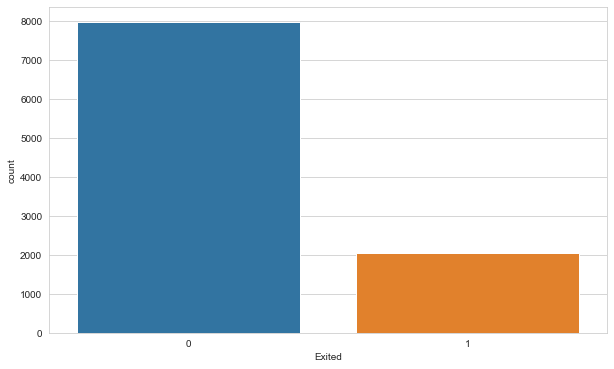

In [16]:
sns.countplot(df["Exited"])

array([[<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>,
        <AxesSubplot:title={'center':'IsActiveMember'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>],
       [<AxesSubplot:title={'center':'Exited'}>,
        <AxesSubplot:title={'center':'Gender_Female'}>,
        <AxesSubplot:title={'center':'Gender_Male'}>,
        <AxesSubplot:title={'center':'Geography_France'}>],
       [<AxesSubplot:title={'center':'Geography_Germany'}>,
        <AxesSubplot:title={'center':'Geography_Spain'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

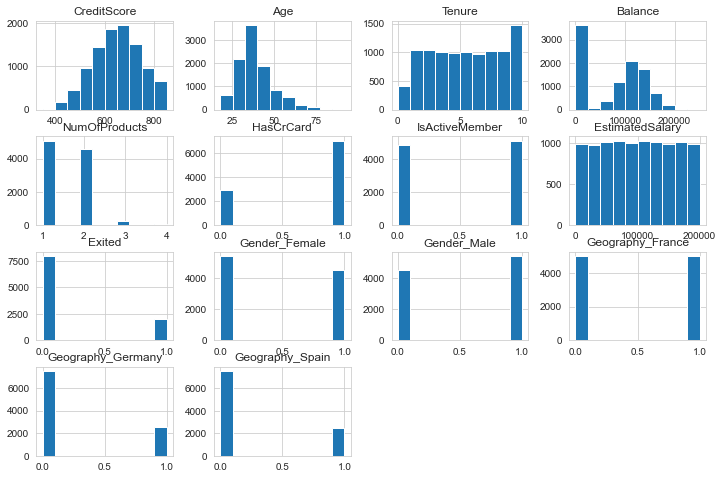

In [32]:
df.hist(figsize=(12,8))

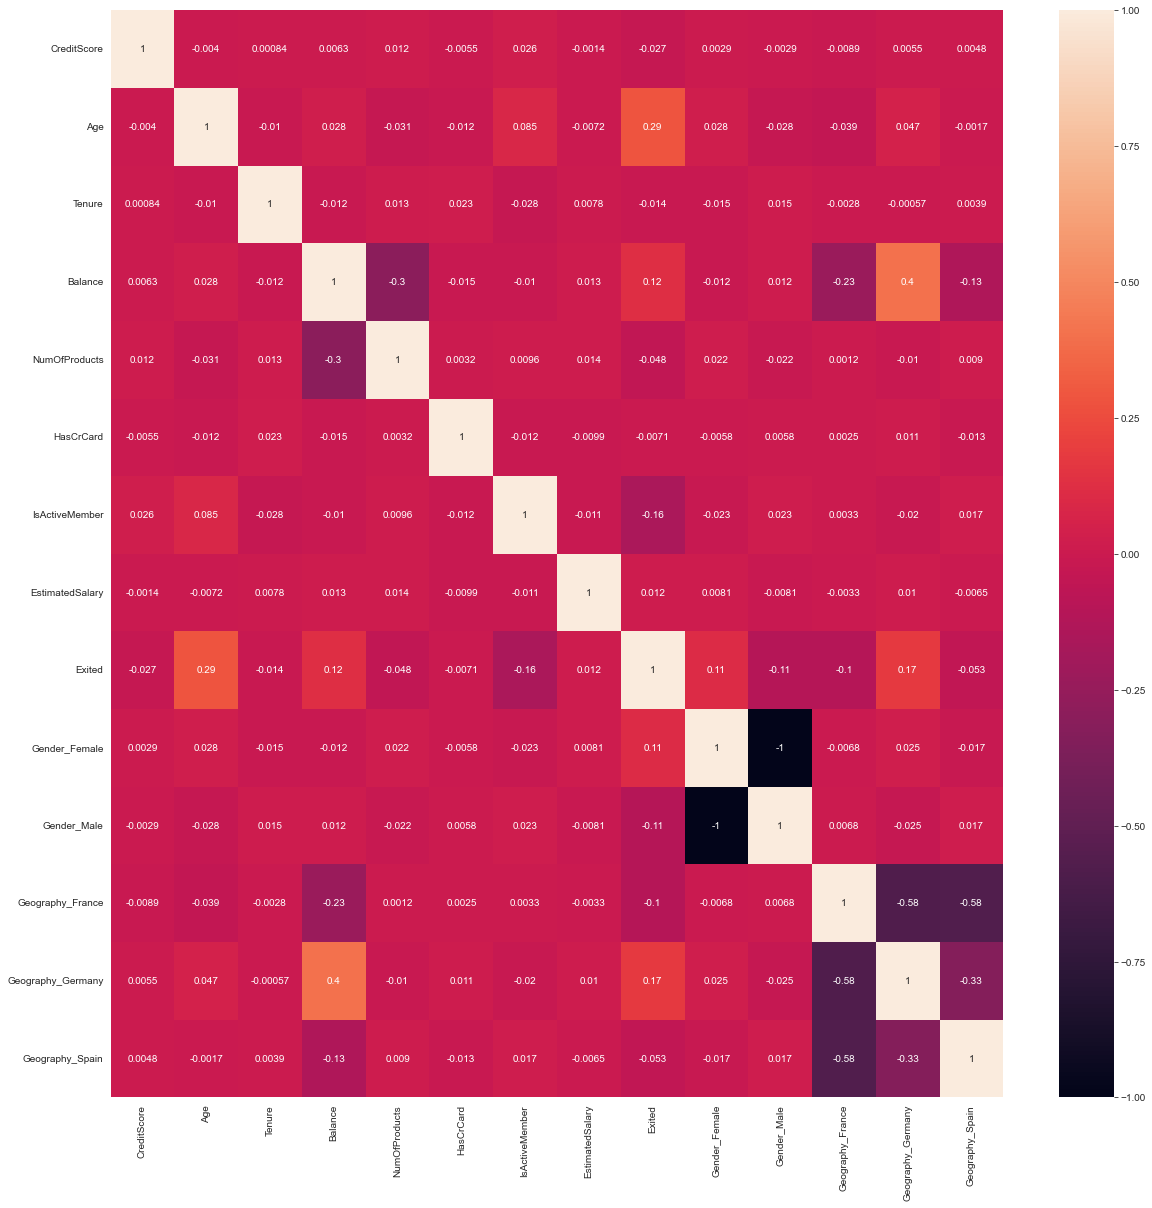

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

## Preprocessing of Data
- Train | Test Split, Scalling

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [19]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [20]:
seed = 42

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [22]:
scaler = MinMaxScaler()

In [23]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

### Import related libraries

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [25]:
X_train.shape

(9000, 13)

In [28]:
X_test.shape

(1000, 13)

### Creating Model

### without class_weigth

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [51]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [52]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 200, verbose = 1,
          callbacks = [early_stop])

Epoch 1/200
64/64 [==============================] - 2s 17ms/step - loss: 0.5399 - recall: 0.0115 - val_loss: 0.4828 - val_recall: 0.0000e+00
Epoch 2/200
64/64 [==============================] - 0s 4ms/step - loss: 0.4886 - recall: 0.0000e+00 - val_loss: 0.4665 - val_recall: 0.0000e+00
Epoch 3/200
64/64 [==============================] - 0s 6ms/step - loss: 0.4754 - recall: 0.0000e+00 - val_loss: 0.4547 - val_recall: 0.0000e+00
Epoch 4/200
64/64 [==============================] - 0s 4ms/step - loss: 0.4668 - recall: 0.0000e+00 - val_loss: 0.4470 - val_recall: 0.0000e+00
Epoch 5/200
64/64 [==============================] - 0s 7ms/step - loss: 0.4616 - recall: 0.0085 - val_loss: 0.4422 - val_recall: 0.0055
Epoch 6/200
64/64 [==============================] - 0s 6ms/step - loss: 0.4568 - recall: 0.0194 - val_loss: 0.4370 - val_recall: 0.0110
Epoch 7/200
64/64 [==============================] - 0s 7ms/step - loss: 0.4532 - recall: 0.0478 - val_loss: 0.4327 - val_recall: 0.1105
Epoch 8/200


In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                224       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.history.history

{'loss': [0.5399170517921448,
  0.48863714933395386,
  0.4754035174846649,
  0.46683362126350403,
  0.46157899498939514,
  0.4567679166793823,
  0.45318055152893066,
  0.4491581916809082,
  0.44549936056137085,
  0.44176721572875977,
  0.4382043182849884,
  0.43512436747550964,
  0.4327832758426666,
  0.43113189935684204,
  0.42903581261634827,
  0.42750367522239685,
  0.4253148138523102,
  0.42373183369636536,
  0.4222719967365265,
  0.42004314064979553,
  0.41814494132995605,
  0.4160735309123993,
  0.4142480790615082,
  0.4120286703109741,
  0.409151554107666,
  0.4077240228652954,
  0.40483564138412476,
  0.4030686914920807,
  0.40029338002204895,
  0.3978746235370636,
  0.395345538854599,
  0.3925453722476959,
  0.389391154050827,
  0.3873307704925537,
  0.38560277223587036,
  0.38241249322891235,
  0.3821384310722351,
  0.3788450062274933,
  0.3762209415435791,
  0.3746459186077118,
  0.37269267439842224,
  0.3714454770088196,
  0.3695172071456909,
  0.36842313408851624,
  0.3665

In [56]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.540,0.012,0.483,0.000
1,0.489,0.000,0.466,0.000
2,0.475,0.000,0.455,0.000
3,0.467,0.000,0.447,0.000
4,0.462,0.008,0.442,0.006


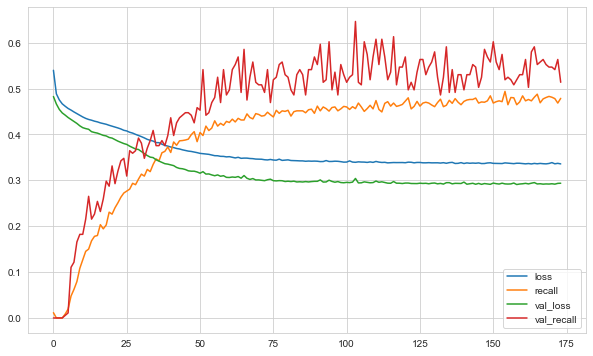

In [57]:
loss_df.plot();

In [58]:
model.evaluate(X_test, y_test, verbose=0)

[0.3413439989089966, 0.45098039507865906]

In [70]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", Recall)

loss :  0.5092834830284119
Recall :  0.813725471496582


In [60]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[774  22]
 [112  92]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.81      0.45      0.58       204

    accuracy                           0.87      1000
   macro avg       0.84      0.71      0.75      1000
weighted avg       0.86      0.87      0.85      1000



In [61]:
from tensorflow.keras.layers import Dropout

In [62]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(8, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [63]:
from tensorflow.keras.callbacks import EarlyStopping

In [61]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [42]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
254/254 [==============================] - 2s 3ms/step - loss: 0.5071 - accuracy: 0.7927 - val_loss: 0.4558 - val_accuracy: 0.7989
Epoch 2/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4785 - accuracy: 0.7980 - val_loss: 0.4436 - val_accuracy: 0.8078
Epoch 3/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4656 - accuracy: 0.8005 - val_loss: 0.4242 - val_accuracy: 0.8233
Epoch 4/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4528 - accuracy: 0.8048 - val_loss: 0.4132 - val_accuracy: 0.8278
Epoch 5/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4427 - accuracy: 0.8080 - val_loss: 0.3968 - val_accuracy: 0.8344
Epoch 6/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4301 - accuracy: 0.8120 - val_loss: 0.3802 - val_accuracy: 0.8500
Epoch 7/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4178 - accuracy: 0.8209 - val_loss: 0.3654 - val_accuracy:

#### Evaluate

<AxesSubplot:>

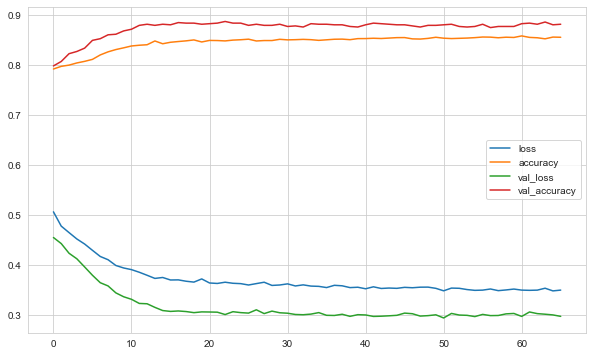

In [43]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [44]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3440805673599243
accuracy :  0.859000027179718


In [45]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[767  29]
 [112  92]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       796
           1       0.76      0.45      0.57       204

    accuracy                           0.86      1000
   macro avg       0.82      0.71      0.74      1000
weighted avg       0.85      0.86      0.84      1000



### with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [27]:
from sklearn.utils import class_weight

In [67]:

class_weight = class_weight.compute_class_weight("balanced",classes = np.unique(y_train), y =y_train)
cw =  {0 : class_weight[0], 1:class_weight[1] }
cw

{0: 0.6278777731268314, 1: 2.454991816693944}

In [68]:
model.fit(x = X_train, y = y_train, class_weight=cw, validation_split = 0.1, batch_size = 128, epochs = 200, verbose = 1, callbacks= [early_stop])

Epoch 1/200
64/64 [==============================] - 3s 17ms/step - loss: 0.6959 - recall: 0.3941 - val_loss: 0.6741 - val_recall: 0.6740
Epoch 2/200
64/64 [==============================] - 0s 6ms/step - loss: 0.6788 - recall: 0.5569 - val_loss: 0.6657 - val_recall: 0.7072
Epoch 3/200
64/64 [==============================] - 0s 6ms/step - loss: 0.6758 - recall: 0.6017 - val_loss: 0.6551 - val_recall: 0.7127
Epoch 4/200
64/64 [==============================] - 0s 6ms/step - loss: 0.6628 - recall: 0.6326 - val_loss: 0.6285 - val_recall: 0.6630
Epoch 5/200
64/64 [==============================] - 0s 5ms/step - loss: 0.6535 - recall: 0.6253 - val_loss: 0.6528 - val_recall: 0.7624
Epoch 6/200
64/64 [==============================] - 0s 5ms/step - loss: 0.6470 - recall: 0.6598 - val_loss: 0.6149 - val_recall: 0.7072
Epoch 7/200
64/64 [==============================] - 0s 6ms/step - loss: 0.6390 - recall: 0.6374 - val_loss: 0.6350 - val_recall: 0.7569
Epoch 8/200
64/64 [=====================

#### Evaluate

<AxesSubplot:>

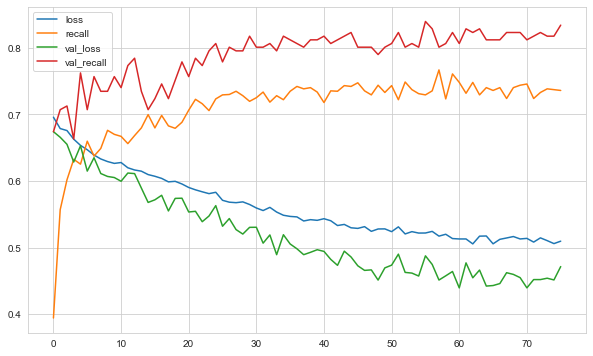

In [69]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [71]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", Recall)

loss :  0.5092834830284119
Recall :  0.813725471496582


In [72]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[571 225]
 [ 38 166]]
              precision    recall  f1-score   support

           0       0.94      0.72      0.81       796
           1       0.42      0.81      0.56       204

    accuracy                           0.74      1000
   macro avg       0.68      0.77      0.69      1000
weighted avg       0.83      0.74      0.76      1000



In [75]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

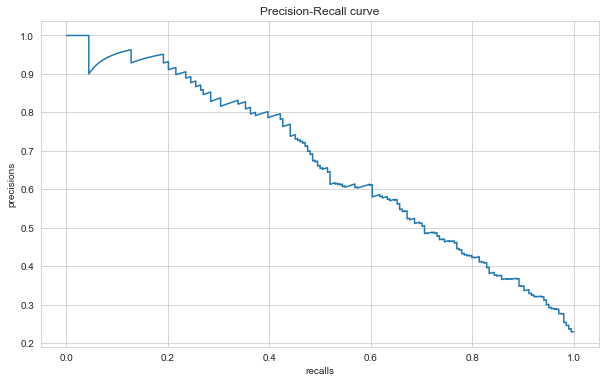

In [76]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [77]:
average_precision_score(y_test, y_pred_proba)

0.6663484021403591

## GridSearchCV

In [73]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [78]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [79]:
cw

{0: 0.6278777731268314, 1: 2.454991816693944}

In [38]:
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "auto", verbose = 1, patience = 15)

In [82]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [128, 256],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 3,
                          n_jobs = -1,
                          verbose = 0)

grid_model.fit(X_train, y_train,class_weight=cw)

Epoch 1/200
64/64 [==============================] - 2s 12ms/step - loss: 0.7147 - recall: 0.1628 - val_loss: 0.6781 - val_recall: 0.5967
Epoch 2/200
64/64 [==============================] - 0s 5ms/step - loss: 0.6683 - recall: 0.6447 - val_loss: 0.6601 - val_recall: 0.6630
Epoch 3/200
64/64 [==============================] - 0s 5ms/step - loss: 0.6488 - recall: 0.6525 - val_loss: 0.6121 - val_recall: 0.5801
Epoch 4/200
64/64 [==============================] - 0s 5ms/step - loss: 0.6349 - recall: 0.6356 - val_loss: 0.5878 - val_recall: 0.5856
Epoch 5/200
64/64 [==============================] - 0s 6ms/step - loss: 0.6270 - recall: 0.6259 - val_loss: 0.6193 - val_recall: 0.6906
Epoch 6/200
64/64 [==============================] - 0s 4ms/step - loss: 0.6203 - recall: 0.6610 - val_loss: 0.5781 - val_recall: 0.6464
Epoch 7/200
64/64 [==============================] - 0s 4ms/step - loss: 0.6158 - recall: 0.6538 - val_loss: 0.6082 - val_recall: 0.7182
Epoch 8/200
64/64 [=====================

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F0234AA610>,
             n_jobs=-1,
             param_grid={'batch_size': [128, 256],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>]},
             scoring='recall')

#### Evaluate

In [83]:
grid_model.best_score_

0.7717040665462361

In [84]:
grid_model.best_params_

{'batch_size': 128,
 'learn_rate': 0.001,
 'optimizer': keras.optimizer_v2.adam.Adam}

In [90]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[634 162]
 [ 49 155]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       796
           1       0.49      0.76      0.60       204

    accuracy                           0.79      1000
   macro avg       0.71      0.78      0.73      1000
weighted avg       0.84      0.79      0.80      1000



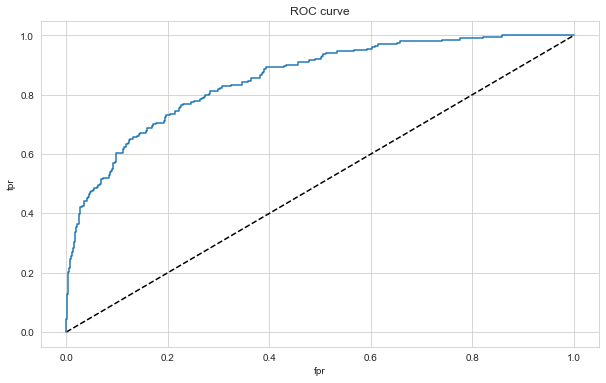

In [86]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [87]:
roc_auc_score(y_test, y_pred_proba)

0.8533599369396001

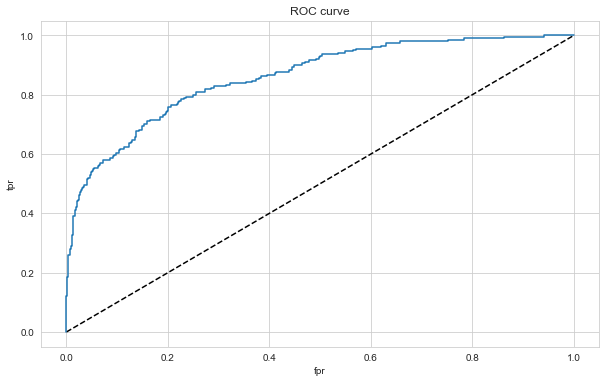

In [88]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [89]:
roc_auc_score(y_test, y_pred_proba)

0.8600662626859789

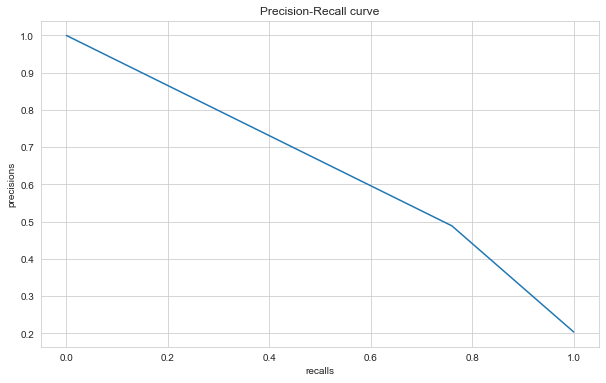

In [91]:
y_pred_proba = grid_model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [92]:
average_precision_score(y_test, y_pred_proba)

0.4205129584957011

## Final Model and Model Deployment

In [93]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [94]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)

model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test), 
          callbacks=[early_stop],
          batch_size=128,
          epochs=150,
          verbose=1,
          class_weight=cw) 

Epoch 1/150
71/71 [==============================] - 1s 7ms/step - loss: 0.7067 - recall: 0.2602 - val_loss: 0.6883 - val_recall: 0.6275
Epoch 2/150
71/71 [==============================] - 0s 3ms/step - loss: 0.6645 - recall: 0.6438 - val_loss: 0.6713 - val_recall: 0.6176
Epoch 3/150
71/71 [==============================] - 0s 3ms/step - loss: 0.6433 - recall: 0.6219 - val_loss: 0.6523 - val_recall: 0.5980
Epoch 4/150
71/71 [==============================] - 0s 3ms/step - loss: 0.6304 - recall: 0.6241 - val_loss: 0.6471 - val_recall: 0.6176
Epoch 5/150
71/71 [==============================] - 0s 3ms/step - loss: 0.6223 - recall: 0.6579 - val_loss: 0.6339 - val_recall: 0.6176
Epoch 6/150
71/71 [==============================] - 0s 5ms/step - loss: 0.6157 - recall: 0.6481 - val_loss: 0.6428 - val_recall: 0.6569
Epoch 7/150
71/71 [==============================] - 0s 3ms/step - loss: 0.6098 - recall: 0.6890 - val_loss: 0.6178 - val_recall: 0.6324
Epoch 8/150
71/71 [======================

<AxesSubplot:>

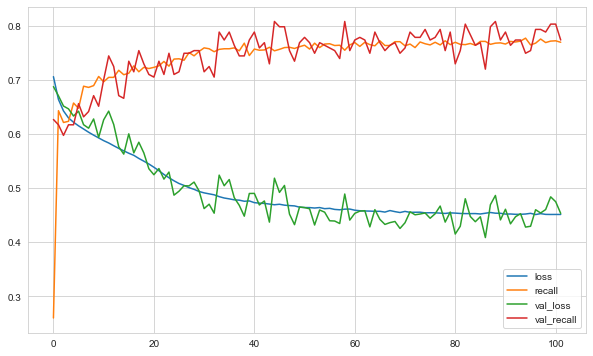

In [95]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [96]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.45366159081459045
recall :  0.7745097875595093


In [97]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[624 172]
 [ 46 158]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       796
           1       0.48      0.77      0.59       204

    accuracy                           0.78      1000
   macro avg       0.71      0.78      0.72      1000
weighted avg       0.84      0.78      0.80      1000



In [98]:
model.save('model_churn.h5')

### Prediction

In [99]:
from tensorflow.keras.models import load_model

In [101]:
model_churn = load_model('model_churn.h5')
scaler_churn = pickle.load(open("scaler_churn", "rb"))

In [102]:
single_customer = df.drop('Exited', axis = 1).iloc[0:1, :]
single_customer

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.000,1,1,1,101348.880,1,0,1,0,0


In [103]:
single_customer = scaler_churn.transform(single_customer)
single_customer

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 1.        , 0.        ,
        1.        , 0.        , 0.        ]])

In [104]:
(model_churn.predict(single_customer) > 0.5).astype("int32")

array([[1]])

In [105]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___